In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

In [2]:
"""With the first argument, units, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

With the second argument, input_shape, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein')."""

"With the first argument, units, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.\n\nWith the second argument, input_shape, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein')."

In [3]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd

concrete = pd.read_csv('/home/tebrigabby/python/data_files/concrete.csv')
concrete.head()

/tmp/ipykernel_6254/491294156.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete.shape

(1030, 9)

In [5]:
# Input Shape
# The target for this task is the column 'CompressiveStrength'. The remaining columns are the features we'll use as inputs.

input_shape = [8]

In [6]:
# Define a Model with Hidden Layers
# Now create a model with three hidden layers, each having 512 units and the ReLU activation. Be sure to include an output layer 
# of one unit and no activation, and also input_shape as an argument to the first layer.

from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),    
    layers.Dense(1),
])

In [7]:
#  Activation Layers

model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

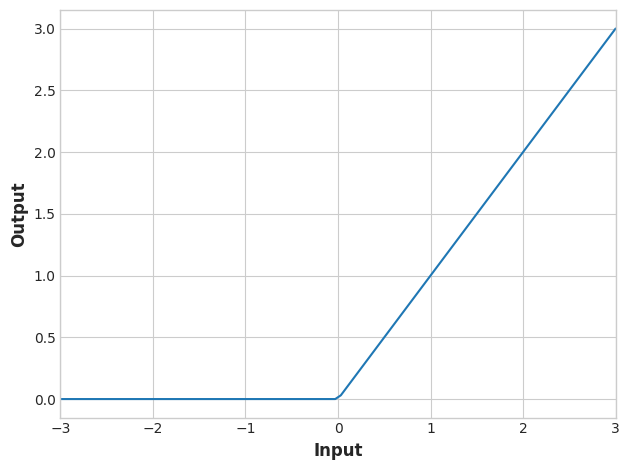

In [9]:
# Optional: Alternatives to ReLU - Change 'relu' to 'elu', 'selu', 'swish'... or something else

activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [10]:
# A "loss function" that measures how good the network's predictions are.
# An "optimizer" that can tell the network how to change its weights.

In [11]:
# Stochastic Gradient Descent
# Learning Rate and Batch Size 

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/home/tebrigabby/python/data_files/red_wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [12]:
print(X_train.shape)

(1119, 11)


In [13]:
# Eleven columns means eleven inputs.
# We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

# After defining the model, we compile in the optimizer and loss function.
model.compile(
    optimizer='adam',
    loss='mae',
)

In [14]:
# Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time 
# (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 9s 382ms/step - loss: 0.2933 - val_loss: 0.1377
Epoch 2/10
5/5 [==============================] - 1s 111ms/step - loss: 0.1480 - val_loss: 0.1232
Epoch 3/10
5/5 [==============================] - 0s 94ms/step - loss: 0.1269 - val_loss: 0.1164
Epoch 4/10
5/5 [==============================] - 1s 117ms/step - loss: 0.1166 - val_loss: 0.1078
Epoch 5/10
5/5 [==============================] - 1s 101ms/step - loss: 0.1116 - val_loss: 0.1133
Epoch 6/10
5/5 [==============================] - 1s 111ms/step - loss: 0.1098 - val_loss: 0.1032
Epoch 7/10
5/5 [==============================] - 1s 147ms/step - loss: 0.1049 - val_loss: 0.1032
Epoch 8/10
5/5 [==============================] - 1s 99ms/step - loss: 0.1037 - val_loss: 0.1023
Epoch 9/10
5/5 [==============================] - 0s 100ms/step - loss: 0.1022 - val_loss: 0.0999
Epoch 10/10
5/5 [==============================] - 0s 98ms/step - loss: 0.1003 - val_loss: 0.1047


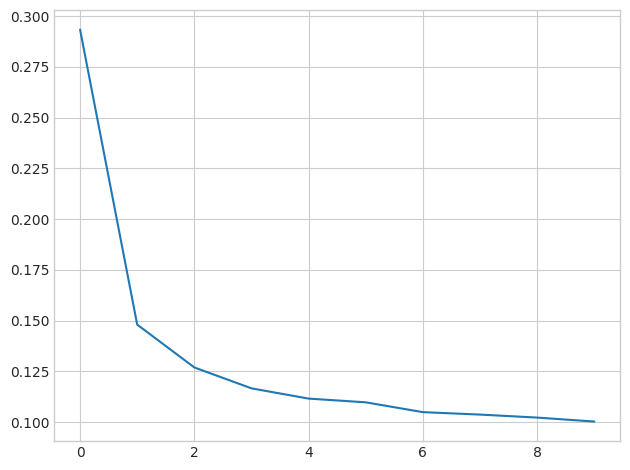

In [15]:
# You can see that Keras will keep you updated on the loss as the model trains.
# Often, a better way to view the loss though is to plot it. The fit method in fact keeps a record of the loss produced during training 
# in a History object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [16]:
# Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has 
# learned all it can and there would be no reason continue for additional epochs.

In [22]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
sns.set(style='whitegrid')

/tmp/ipykernel_6254/1071669168.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('/home/tebrigabby/python/data_files/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


/home/tebrigabby/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
# Our target in this case is the `'FE'` column and the remaining columns are the features.

fuel.head()
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from tensorflow import keras
from tensorflow.keras import layers

# build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [26]:
# Add Loss and Optimizer
# Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.

model.compile(
    optimizer='adam',
    loss='mae'
)

In [27]:
# Train Model
# Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. 
# The input data is X with target y.

history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 4s 23ms/step - loss: 2.9609
Epoch 2/200
9/9 [==============================] - 0s 18ms/step - loss: 1.1734
Epoch 3/200
9/9 [==============================] - 0s 17ms/step - loss: 0.6468
Epoch 4/200
9/9 [==============================] - 0s 16ms/step - loss: 0.3432
Epoch 5/200
9/9 [==============================] - 0s 19ms/step - loss: 0.2809
Epoch 6/200
9/9 [==============================] - 0s 17ms/step - loss: 0.1998
Epoch 7/200
9/9 [==============================] - 0s 17ms/step - loss: 0.1453
Epoch 8/200
9/9 [==============================] - 0s 18ms/step - loss: 0.1205
Epoch 9/200
9/9 [==============================] - 0s 19ms/step - loss: 0.1028
Epoch 10/200
9/9 [==============================] - 0s 16ms/step - loss: 0.0905
Epoch 11/200
9/9 [==============================] - 0s 18ms/step - loss: 0.0835
Epoch 12/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0752
Epoch 13/200
9/9 [==============================]

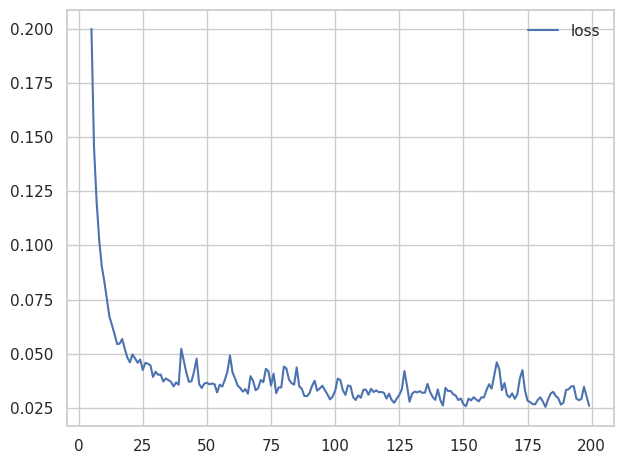

In [28]:
# The last step is to look at the loss curves and evaluate the training. Get a plot of the training loss.
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [29]:
# Evaluate Training - If you trained the model longer, would you expect the loss to decrease further?
"""Correct:

This depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs. Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous."""

"Correct:\n\nThis depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs. Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous."

In [31]:
# Example - Train a Model with Early Stopping¶

In [33]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/home/tebrigabby/python/data_files/red_wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [34]:
# Now let's increase the capacity of the network. We'll go for a fairly large network, but rely on the callback to halt the training 
# once the validation loss shows signs of increasing.

from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.08941365778446198


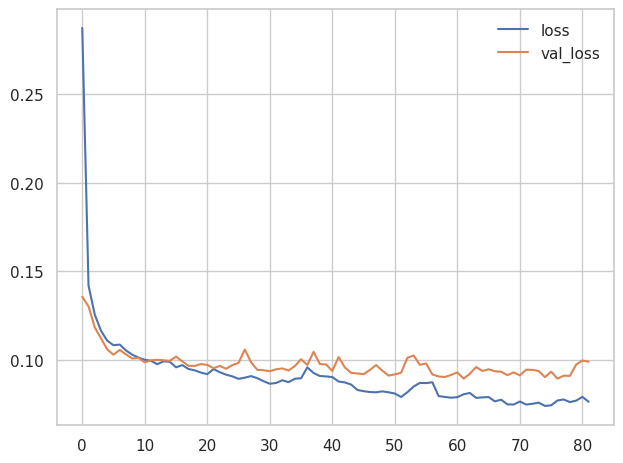

In [35]:
# After defining the callback, add it as an argument in fit (you can have several, so put it in a list). 
# Choose a large number of epochs when using early stopping, more than you'll need.

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))